In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

/home/khin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv('features.csv')
df.head(3)

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,label
0,-4.015884,-5.337801,3.880235,-2.612753,-30.765772,-31.996782,-15.814099,-3.350799,-3.706910,-17.836277,-13.396485,-10.769270,male
1,-0.398436,-22.386601,-17.671561,1.157095,-25.274026,-13.027446,-30.996784,9.600207,1.963798,-13.853052,-30.468489,-15.506199,male
2,-1.668531,-4.332610,-13.569998,-10.448085,-34.465060,-11.890284,-23.942041,-33.508446,13.719242,18.943690,-9.748084,-11.789779,male


In [3]:
df.tail(3)

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,label
597,-2.241353,-8.969100,7.169721,18.020628,-5.844882,-24.045389,-23.155617,-3.639931,-29.574649,-11.762388,-7.103109,-15.055187,female
598,-5.199849,7.509791,-29.952706,9.367084,-20.967097,8.949095,-19.338754,-26.104784,-4.497418,6.279948,-13.067591,-7.391434,female
599,-2.333304,-11.949313,5.424600,4.928143,-26.588636,-20.469231,-20.621021,-12.143301,-27.850742,-15.173062,4.316390,-17.864485,female


In [3]:
#producing x and y
x= pd.read_csv('features.csv',header=None,usecols=range(1,12) ,skiprows=1)
x = np.array(x)
print(x)

[[ -5.33780149   3.8802354   -2.61275278 ... -17.8362767  -13.39648472
  -10.76927015]
 [-22.3866007  -17.67156111   1.15709475 ... -13.85305179 -30.46848923
  -15.50619907]
 [ -4.33260971 -13.56999827 -10.44808542 ...  18.94369015  -9.74808428
  -11.78977933]
 ...
 [ -8.96909982   7.16972122  18.02062792 ... -11.76238794  -7.10310877
  -15.05518741]
 [  7.50979113 -29.95270637   9.36708373 ...   6.27994814 -13.06759089
   -7.39143391]
 [-11.94931284   5.42459976   4.92814274 ... -15.17306211   4.31639003
  -17.86448538]]


In [4]:
y= pd.read_csv('features.csv',usecols=range(12,13),header=None,skiprows=1)
y = np.array(y)
print(y)

#lABEL ENCODING
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
print(y)

[['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']
 ['male']


/home/khin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/khin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
#Dividing the data randomly into training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier( )
model.fit(x_train, y_train)

print('Accuracy1 for RandomForest :',model.score(x_train,y_train))
print('Accuracy2 for RandomForest  :',model.score(x_test,y_test))

Accuracy1 for RandomForest : 0.9854166666666667
Accuracy2 for RandomForest  : 0.8416666666666667


In [33]:
y_pred_class = model.predict(x_test)
print(y_pred_class)
print(y_test)
from sklearn import metrics
print('Classification Accuracy is:',metrics.accuracy_score(y_test, y_pred_class))

[0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0
 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0
 1 0 1 0 1 0 0 0 0]
[0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1
 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0
 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0]
Classification Accuracy is: 0.8416666666666667


In [9]:
'''# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
print('Percentage of ones:',y_test.mean())
# calculate the percentage of zeros
print('percentage of zeros:',1 - y_test.mean())'''

Percentage of ones: 0.525
percentage of zeros: 0.475


In [8]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
#print(max(y_test.mean(), 1 - y_test.mean()))

0.5333333333333333


In [9]:
# print the first 25 true and predicted responses
print('True:', y_test[0:25])
print('False:', y_pred_class[0:25])

True: [0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0]
False: [0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0]


In [34]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class,)
pd.crosstab(y_test, y_pred_class, rownames=['Actual'], colnames=['Predicted'],margins=True)

[[53 11]
 [ 8 48]]


Predicted,0,1,All
Actual,,,
0,53,11,64
1,8,48,56
All,61,59,120


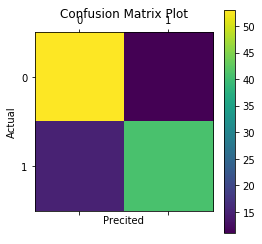

In [11]:
plt.matshow(confusion)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();


In [31]:
TN=54
FP=10
FN=16
TP=40
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Classification Error : ",classification_error)
#print(1 - metrics.accuracy_score(y_test, y_pred_class))

Classification Error :  0.21666666666666667


In [17]:
sensitivity = TP / float(FN + TP)
print("Sensitivity : ",sensitivity)
#print(metrics.recall_score(y_test, y_pred_class))

Sensitivity :  0.9166666666666666


In [18]:
specificity = TN / (TN + FP)
print("Specificity : ",specificity)

Specificity :  0.8611111111111112


In [89]:
'''false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)'''

0.1388888888888889
0.13888888888888884


In [19]:
precision = TP / float(TP + FP)
print("Precision : ",precision)
#print(metrics.precision_score(y_test, y_pred_class))

Precision :  0.8148148148148148


In [32]:
print(metrics.f1_score(y_test, y_pred_class))

0.7547169811320756


In [8]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [16]:
scores = cross_val_score(model, x, y, cv=10)
print ("Cross-validated scores : ", scores)
print(np.mean(scores))

Cross-validated scores :  [0.91666667 0.76666667 0.78333333 0.9        0.88333333 0.88333333
 0.86666667 0.8        0.85       0.85      ]
0.85


In [17]:
#cm_holder = []
i=1
kf = KFold(n_splits=10, random_state=None, shuffle=True)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):

    X_train, X_test = x[train_index],x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    #cm_holder.append(confusion_matrix(y_test, y_pred_class))
    print("Cross Validaton ", i ," : ",metrics.accuracy_score(y_test, y_pred_class))
    i+=1
    print (confusion_matrix(y_test, model.predict(X_test)))
#print(cm_holder)
#print(10* '#')

Cross Validaton  1  :  0.8666666666666667
[[28  3]
 [ 5 24]]
Cross Validaton  2  :  0.8333333333333334
[[27  5]
 [ 5 23]]
Cross Validaton  3  :  0.8333333333333334
[[24  4]
 [ 6 26]]
Cross Validaton  4  :  0.8
[[20  4]
 [ 8 28]]
Cross Validaton  5  :  0.8333333333333334
[[24  3]
 [ 7 26]]
Cross Validaton  6  :  0.9333333333333333
[[26  2]
 [ 2 30]]
Cross Validaton  7  :  0.85
[[27  4]
 [ 5 24]]
Cross Validaton  8  :  0.8333333333333334
[[27  5]
 [ 5 23]]
Cross Validaton  9  :  0.85
[[25  5]
 [ 4 26]]
Cross Validaton  10  :  0.8
[[32  5]
 [ 7 16]]
